## **Actividad: Regresión Lineal 2**

**Andrés Alejandro Guzmán González - A01633819**

Regresión lineal múltiple

Descarga la base de datos titulada "breast_cancer" disponible en canvas. Dicha base de datos contiene información sobre las características de diversos tumores.

Utiliza un modelo de regresión lineal múltiple para predecir el radio del tumor. Las variables regresoras de tu modelo deben de ser todas las variables de la base de datos.

Entrega un documento en formato PDF donde se observe la siguiente información.

1. Base de datos completa. No se observan valores faltantes. En caso de haberlos se realiza imputación simple.

2. Mostrar que las variables regresoras son independientes. En caso de no serlo realizar el procedimiento correspondiente.

3. Hipótesis nula de los coeficientes de regresión. Estadístico de prueba, distribución del estadístico de prueba. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

4. Hipótesis nula de la significancia del modelo (prueba F-Fisher). Menciona que distribución tiene el estadístico de prueba con qué número de grados de libertad. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

5. Realiza un modelo de regresión hacia atrás (backward). Explica el criterio para ir eliminando variables del modelo.

6. Comparación entre datos reales y predicción. Análisis de los resultados.



###**Llamado a librerías:**

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f


### **Paso 1.**
Base de datos completa. No se observan valores faltantes. En caso de haberlos se realiza imputación simple.

Primero se inicializa él data frame, posteriormente validamos que no haya valores nulos y retiramos las variables que so se van a considerar en el modelo como es el caso de ID y Diagnóstico.

In [141]:
df = pd.read_csv('/content/sample_data/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [142]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [143]:
df.drop(['id','diagnosis','concave points_mean','concave points_se','concave points_worst'], axis = 1, inplace=True)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.2364,0.07678


### **Paso 2.**

 Mostrar que las variables regresoras son independientes. En caso de no serlo realizar el procedimiento correspondiente.

Aquí se utilizó una matriz de correlación para ver de manera más visual si las variables del modelo están correlacionadas. De igual manera ubiqué en que parte del arreglo se encontraban los valores con alta correlación. Dicho esto, se procedió a estandarizar los datos.

<Axes: >

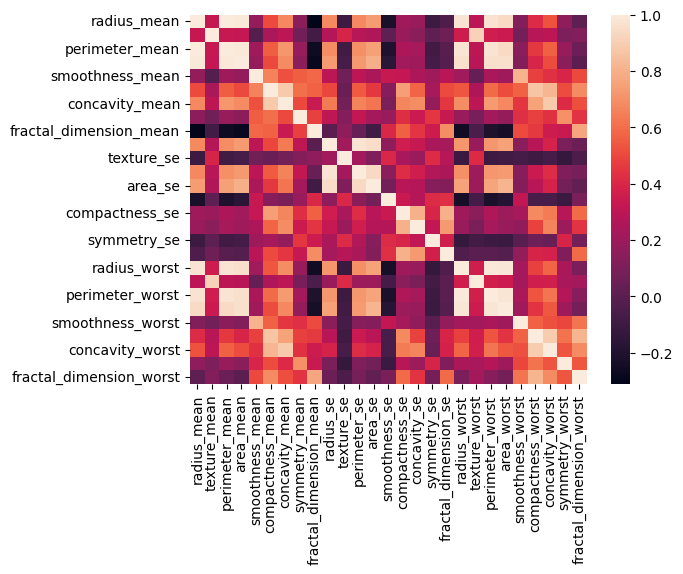

In [144]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False)

In [145]:
correlacion = df.corr()
alt_corr = np.where((correlacion > 0.95) & (correlacion < 1))
alt_corr

(array([ 0,  0,  0,  0,  2,  2,  2,  2,  3,  3,  3,  3,  3,  9,  9, 11, 12,
        18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 21, 21, 21]),
 array([ 2,  3, 18, 20,  0,  3, 18, 20,  0,  2, 18, 20, 21, 11, 12,  9,  9,
         0,  2,  3, 20, 21,  0,  2,  3, 18, 21,  3, 18, 20]))

In [146]:
baja_corr = np.where((correlacion < -0.95) & (correlacion > -1))
baja_corr

(array([], dtype=int64), array([], dtype=int64))

In [147]:
scaler = StandardScaler()

In [148]:
df_estandar = scaler.fit_transform(df)

In [149]:
df_estandar = pd.DataFrame(df_estandar, columns=df.columns)
df_estandar

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,1.919083,2.219635


In [150]:
entrenamiento, prueba = train_test_split(df_estandar, test_size=0.20, random_state=42)
entrenamiento

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
68,-1.447987,-0.456023,-1.366651,-1.150124,0.728714,0.700428,2.814833,1.093024,2.503828,-0.280696,...,2.180277,-1.234044,-0.492965,-1.243893,-0.977194,0.693984,1.159269,4.700669,2.147190,1.859432
181,1.977508,1.694187,2.089619,1.866047,1.262455,3.389643,2.007548,2.129892,1.585220,0.810729,...,0.567413,2.155897,1.270634,2.062335,2.124291,0.733436,3.207003,1.946890,1.936879,2.463465
63,-1.407089,-1.263516,-1.349763,-1.120545,-1.362838,-0.318972,-0.363081,1.932741,0.968562,0.016703,...,0.766752,-1.296169,-1.049890,-1.241212,-1.002860,-1.490797,-0.550038,-0.635617,0.616770,0.052877
248,-0.987600,1.380033,-0.986877,-0.875668,0.014925,-0.606466,-0.816190,0.311723,0.069801,-0.561131,...,-0.444787,-0.832304,1.549097,-0.872165,-0.746907,0.768505,-0.728158,-0.766109,0.822228,-0.137199
60,-1.123927,-1.026155,-1.129395,-0.975496,1.212639,-0.449737,-0.978777,3.400421,0.964310,0.399279,...,0.816303,-1.087016,-1.339752,-1.114026,-0.900022,-0.213419,-0.989865,-1.201820,1.061659,-0.207578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.488033,-1.082004,-1.366651,-1.168611,0.104593,0.924055,-0.034392,0.329977,3.827870,0.436815,...,6.859624,-1.353531,-1.629614,-1.331463,-1.048038,-0.511503,-0.067845,-0.617866,-1.046309,1.355149
106,-0.706426,-0.223317,-0.691956,-0.689379,1.269571,-0.050051,-0.227236,-0.038768,0.340564,-0.357933,...,0.017058,-0.648001,0.583433,-0.647878,-0.630885,1.597003,0.074651,0.072498,-0.153294,0.389251
270,0.046211,-0.574704,-0.068748,-0.063392,-2.282296,-1.470464,-1.023849,-1.108494,-1.281175,-0.992432,...,-0.913062,-0.281464,-0.818652,-0.381891,-0.344521,-2.047074,-1.297121,-1.120358,-0.716282,-1.260478
435,-0.041833,0.076875,-0.034972,-0.157532,0.686015,0.169787,0.298817,-0.520693,0.374586,-0.665437,...,-0.358924,0.159621,0.834212,0.197742,-0.019835,1.268234,0.652266,0.646282,0.450138,1.194443


### **Paso 3.**

 Hipótesis nula de los coeficientes de regresión. Estadístico de prueba, distribución del estadístico de prueba.

In [151]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [152]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.611e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:39:44   Log-Likelihood:                 1240.8
No. Observations:                 455   AIC:                            -2428.
Df Residuals:                     428   BIC:                            -2316.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

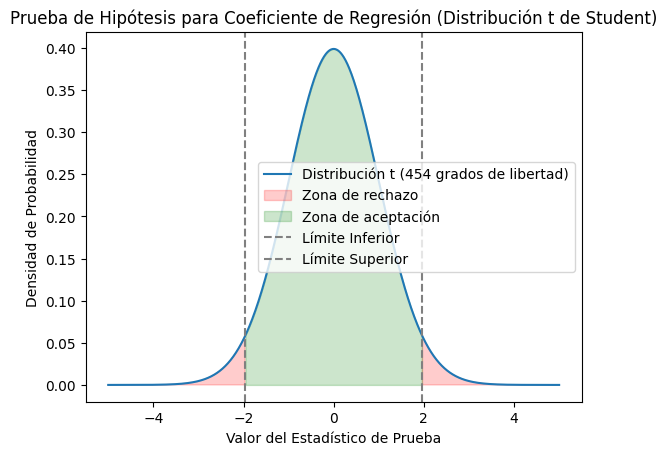

In [153]:
# Prueba de hipótesis utilizando una distribución t de Student
confianza = 0.95
alpha = 1 - confianza
grados_libertad = len(entrenamiento) - 1
valor_critico = stats.t.ppf(1 - alpha / 2, df=grados_libertad)

# Límites de la zona de aceptación y rechazo
limite_inferior = -valor_critico
limite_superior = valor_critico

# Gráfico de la distribución t de Student
x = np.linspace(-5, 5, 1000)
pdf = stats.t.pdf(x, df=grados_libertad)
plt.plot(x, pdf, label=f'Distribución t ({grados_libertad} grados de libertad)')
plt.fill_between(x, 0, pdf, where=(x < limite_inferior) | (x > limite_superior), color='red', alpha=0.2, label='Zona de rechazo')
plt.fill_between(x, 0, pdf, where=(x >= limite_inferior) & (x <= limite_superior), color='green', alpha=0.2, label='Zona de aceptación')

plt.axvline(limite_inferior, color='gray', linestyle='--', label='Límite Inferior')
plt.axvline(limite_superior, color='gray', linestyle='--', label='Límite Superior')

plt.xlabel('Valor del Estadístico de Prueba')
plt.ylabel('Densidad de Probabilidad')
plt.title('Prueba de Hipótesis para Coeficiente de Regresión (Distribución t de Student)')
plt.legend()
plt.show()

Aquí generé los gráficos de los valores obtenidos de todas las variables regresoras para determinar en cuáles se acepta o rechaza la hipótesis nula

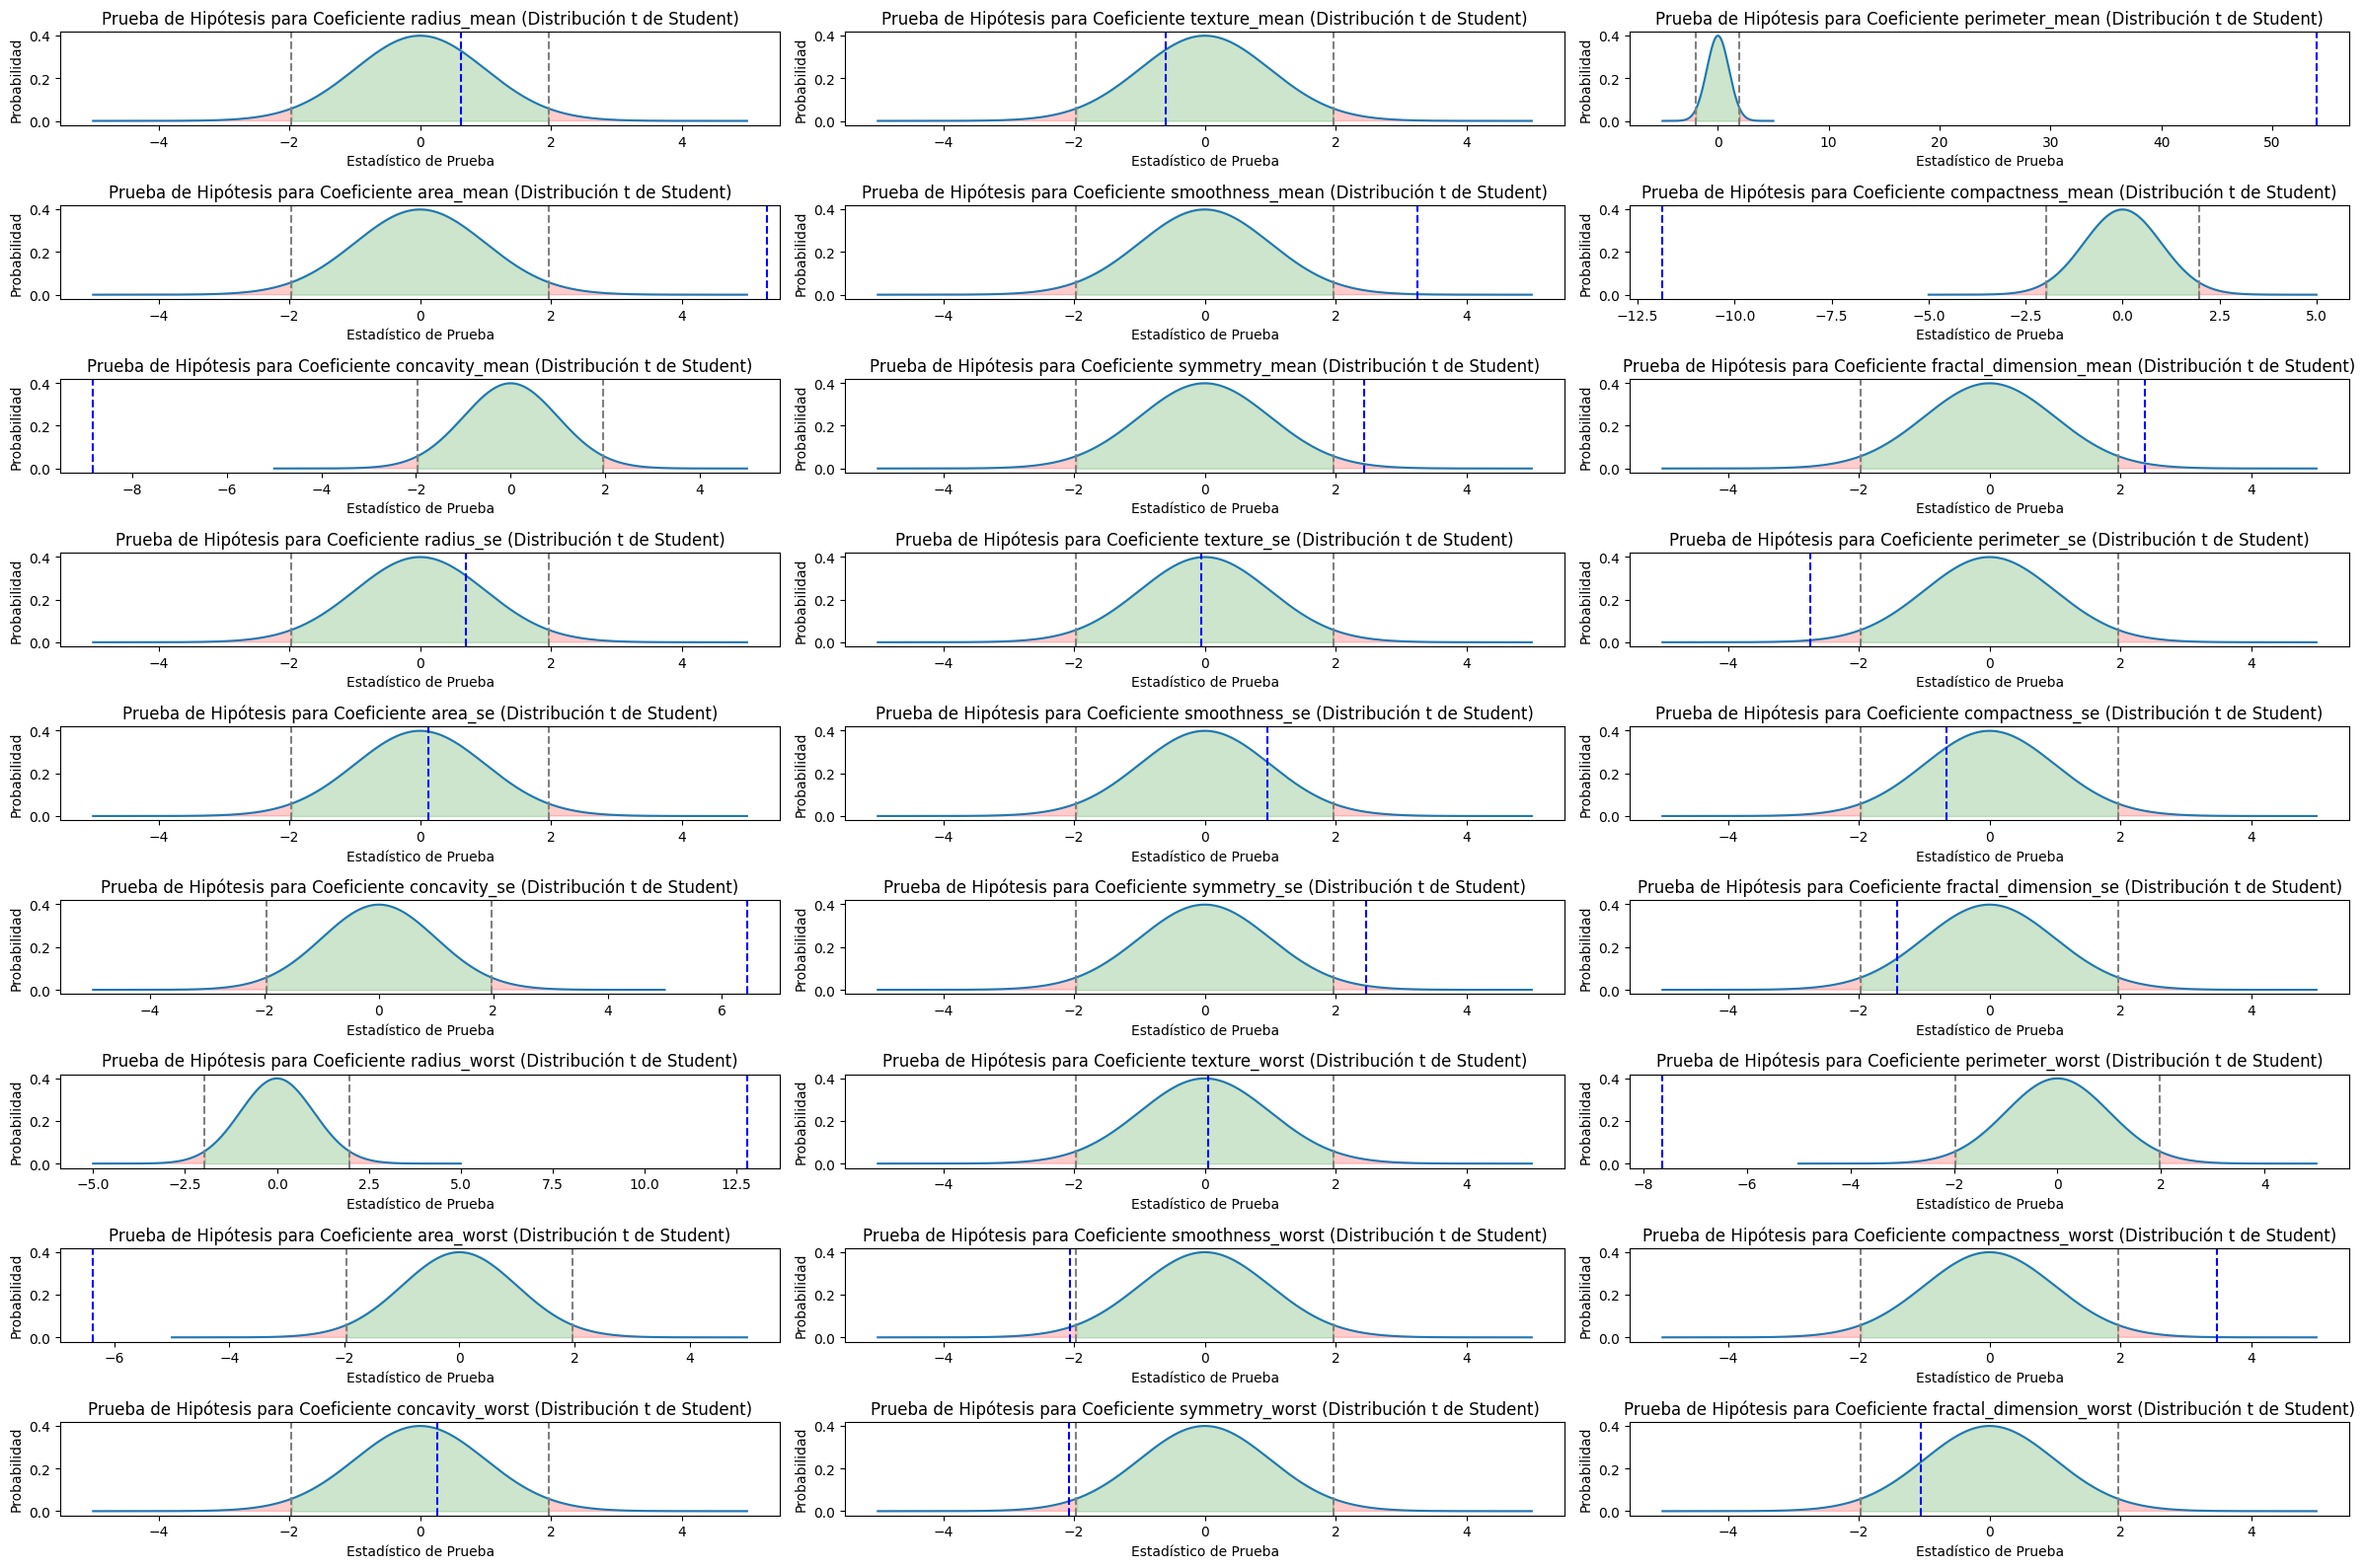

In [154]:
coef_index = 0
confianza = 0.95
alpha = 1 - confianza
grados_libertad = len(entrenamiento) - 1
valor_critico = stats.t.ppf(1 - alpha / 2, df=grados_libertad)

fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(24, 16))
plt.subplots_adjust(hspace=0.5)

limite_inferior = -valor_critico
limite_superior = valor_critico

for i, fila in enumerate(axes):
    for j, ax in enumerate(fila):
        coef = modelo.params[coef_index]
        coef_std_error = modelo.bse[coef_index]
        estadistico_prueba = (coef) / coef_std_error
        x = np.linspace(-5, 5, 1000)
        pdf = stats.t.pdf(x, df=grados_libertad)

        ax.plot(x, pdf, label=f'Distribución t ({grados_libertad} grados de libertad)')
        ax.fill_between(x, 0, pdf, where=(x < limite_inferior) | (x > limite_superior), color='red', alpha=0.2, label='Zona de rechazo')
        ax.fill_between(x, 0, pdf, where=(x >= limite_inferior) & (x <= limite_superior), color='green', alpha=0.2, label='Zona de aceptación')

        ax.axvline(estadistico_prueba, color='blue', linestyle='--', label='Estadístico de Prueba')
        ax.axvline(limite_inferior, color='gray', linestyle='--', label='Límite Inferior')
        ax.axvline(limite_superior, color='gray', linestyle='--', label='Límite Superior')

        ax.set_xlabel('Estadístico de Prueba')
        ax.set_ylabel('Probabilidad')
        ax.set_title('Prueba de Hipótesis para Coeficiente '+str(df.columns[coef_index])+' (Distribución t de Student)')
        coef_index += 1
plt.tight_layout()
plt.show()


### **Paso 4.**

Hipótesis nula de la significancia del modelo (prueba F-Fisher). Menciona que distribución tiene el estadístico de prueba con qué número de grados de libertad. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

Considerando que los resultados del valor F-Static fue (6.611e+04) y que el p-valor de esta prueba dio 0, se puede determinar que hay variables regresoras que impactan o modelan el comportamiento de los datos.

A continuación se muestra la gráfica F - Fisher con el intervalo de confianza al 95%. Cabe mencionar que como el P-Valor es muy alto se encuentra en la zona de rechazo.

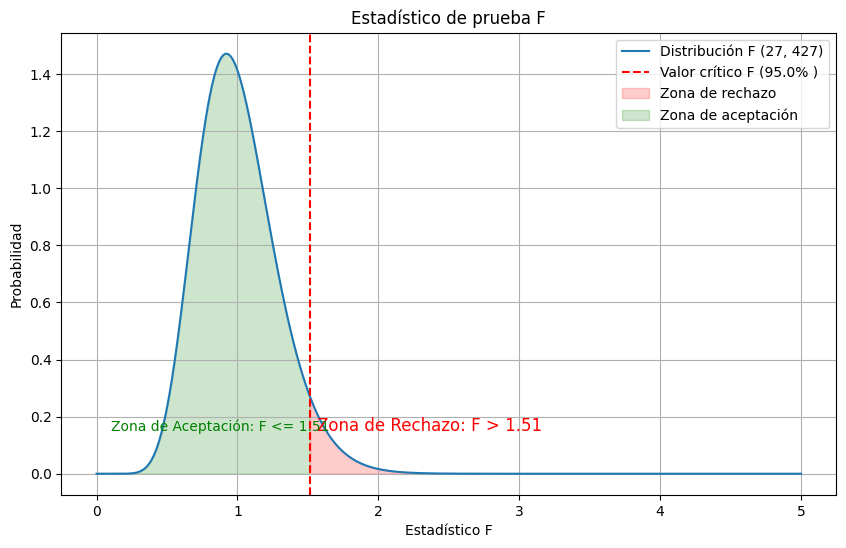

In [155]:
num = 27
den = 455-(28)
confianza = 0.95
valor_critico_F = f.ppf(confianza, dfn=num,dfd=den)

rango_F = np.linspace(0, 5, 1000)
densidad_F = f.pdf(rango_F, dfn=num, dfd=den)

plt.figure(figsize=(10, 6))
plt.plot(rango_F, densidad_F, label=f'Distribución F ({num}, {den})')
plt.axvline(x=valor_critico_F, color='red', linestyle='--', label=f'Valor crítico F ({confianza * 100}% )')
plt.fill_between(rango_F, densidad_F, where=((rango_F > valor_critico_F)), color='red', alpha=0.2, label='Zona de rechazo')
plt.fill_between(rango_F, densidad_F, where=((rango_F <= valor_critico_F)), color='green', alpha=0.2, label='Zona de aceptación')

plt.title('Estadístico de prueba F')
plt.xlabel('Estadístico F')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid()

plt.text(valor_critico_F + 0.05, 0.15, f'Zona de Rechazo: F > {valor_critico_F:.2f}', fontsize=12, color='red')
plt.text(0.1, 0.15, f'Zona de Aceptación: F <= {valor_critico_F:.2f}', fontsize=10, color='green')

plt.show()

### **PASO 5.**
 Realiza un modelo de regresión hacia atrás (backward). Explica el criterio para ir eliminando variables del modelo.

Considerando el primer ajuste del modelo y retomando los valores del P-Valor se procede a eliminar las variables que son menos significativas en el modelo.
Esto se determina discriminando las variables regresoras con el mayor P-Valor si, solo si este tiene un valor mayor a 0.05.

In [156]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.892e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:39:50   Log-Likelihood:                 1240.8
No. Observations:                 455   AIC:                            -2430.
Df Residuals:                     429   BIC:                            -2323.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [157]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.196e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:39:50   Log-Likelihood:                 1240.8
No. Observations:                 455   AIC:                            -2432.
Df Residuals:                     430   BIC:                            -2329.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [158]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+smoothness_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.525e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:39:50   Log-Likelihood:                 1240.8
No. Observations:                 455   AIC:                            -2434.
Df Residuals:                     431   BIC:                            -2335.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [159]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+smoothness_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.884e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:39:50   Log-Likelihood:                 1240.8
No. Observations:                 455   AIC:                            -2436.
Df Residuals:                     432   BIC:                            -2341.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [160]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+smoothness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.270e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:39:51   Log-Likelihood:                 1240.5
No. Observations:                 455   AIC:                            -2437.
Df Residuals:                     433   BIC:                            -2346.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [161]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.692e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:39:51   Log-Likelihood:                 1240.2
No. Observations:                 455   AIC:                            -2438.
Df Residuals:                     434   BIC:                            -2352.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [162]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.150e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:39:51   Log-Likelihood:                 1239.7
No. Observations:                 455   AIC:                            -2439.
Df Residuals:                     435   BIC:                            -2357.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [163]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.653e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:39:51   Log-Likelihood:                 1239.1
No. Observations:                 455   AIC:                            -2440.
Df Residuals:                     436   BIC:                            -2362.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [164]:
modelo = smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.018e+05
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:39:51   Log-Likelihood:                 1237.7
No. Observations:                 455   AIC:                            -2439.
Df Residuals:                     437   BIC:                            -2365.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

### **Paso 6.**
Comparación entre datos reales y predicción. Análisis de los resultados.



Teniendo el ajuste final procedí a crear la función que represente al modelo y posteriormente se hace el análisis gráfico de los errores. Esto se hace calculando la diferencia de las predicciones y los valores reales.

Posteriormente, grafiqué el valor real vs. el valor predecido. En este caso se espera que los datos se ajusten lo mejor posible a la recta $y=x$.

También se graficaron las diferencias de los errores con el fin de ver que tan dispersos se encuentran con respecto de 0.

Además, se realizó el histograma de residuos y un QQ plot.

Todos estos gráficos me permitieron validar que el modelo tiene un excelente ajuste. Pues al comparar las predicciones con los valores reales, estos se mantienen muy cercanos a la línea de tendencia. Así mismo, esto se confirma en la dispersión de errores, pues estos se acotan entre 0.05 y -0.150

In [165]:
y_pred = modelo.params[1]*prueba['perimeter_mean'] + modelo.params[2]*prueba['area_mean'] + modelo.params[3]*prueba['smoothness_mean'] + modelo.params[4]*prueba['compactness_mean'] + modelo.params[5]*prueba['concavity_mean'] + modelo.params[6]*prueba['symmetry_mean'] + modelo.params[7]*prueba['symmetry_mean'] + modelo.params[8]*prueba['perimeter_se'] + modelo.params[9]*prueba['concavity_se'] + modelo.params[10]*prueba['symmetry_se'] + modelo.params[11]*prueba['fractal_dimension_se'] + modelo.params[12]*prueba['radius_worst'] + modelo.params[13]*prueba['perimeter_worst'] + modelo.params[14]*prueba['area_worst'] + modelo.params[15]*prueba['smoothness_worst'] + modelo.params[16]*prueba['compactness_worst'] + modelo.params[17]*prueba['symmetry_worst']
y_pred

204   -0.452369
70     1.367122
131    0.399405
431   -0.507333
540   -0.742339
         ...   
486    0.152368
75     0.550460
249   -0.737218
238    0.007633
265    1.839478
Length: 114, dtype: float64

In [166]:
tabla=pd.DataFrame({'Real': prueba['radius_mean'], 'Prediccion': y_pred, 'Errores': prueba['radius_mean']-y_pred})
tabla

,Real,Prediccion,Errores
204,-0.470694,-0.452369,-0.018326
70,1.366877,1.367122,-0.000244
131,0.378508,0.399405,-0.020897
431,-0.490575,-0.507333,0.016758
540,-0.734828,-0.742339,0.007512
...,...,...,...
486,0.145616,0.152368,-0.006751
75,0.551757,0.550460,0.001296
249,-0.740508,-0.737218,-0.003290
238,0.026330,0.007633,0.018697


Text(0, 0.5, 'Predicción')

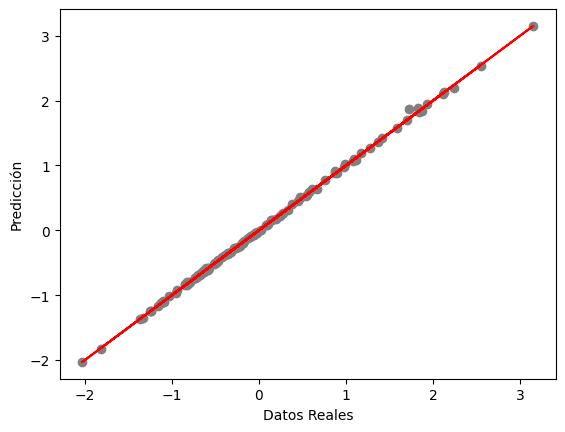

In [167]:
plt.scatter(prueba['radius_mean'], y_pred, color='gray')
plt.plot(prueba['radius_mean'],prueba['radius_mean'], color='red')
plt.xlabel("Datos Reales")
plt.ylabel("Predicción")

Text(0, 0.5, 'Valor del residuo')

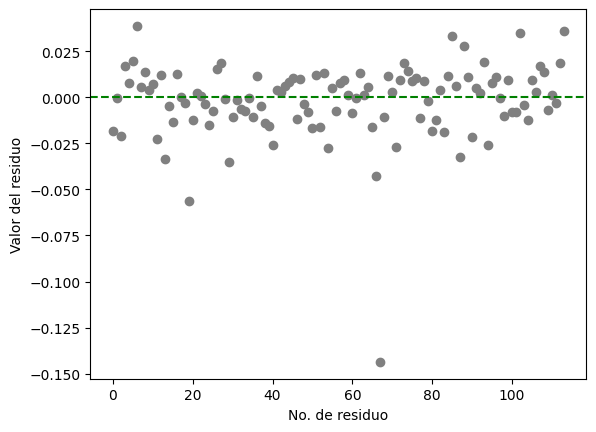

In [168]:
plt.scatter(range(tabla.shape[0]),tabla['Errores'], color='gray')
plt.axhline(y=0, linestyle='--', color='green')
plt.xlabel("No. de residuo")
plt.ylabel("Valor del residuo")

Text(0, 0.5, 'Frecuencia (Probabilidad)')

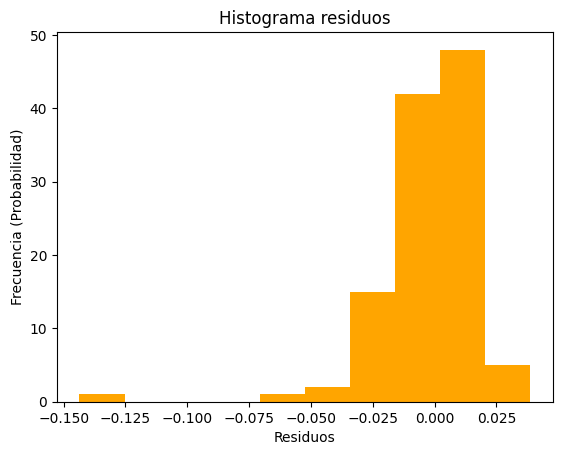

In [169]:
plt.hist(x=tabla['Errores'], color='orange')
plt.title('Histograma residuos')
plt.xlabel("Residuos")
plt.ylabel("Frecuencia (Probabilidad)")

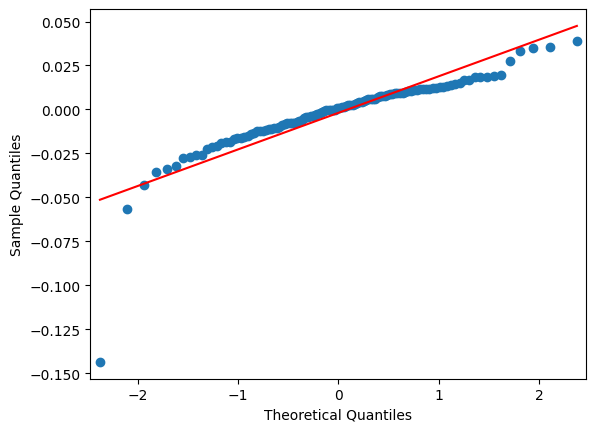

In [170]:
QQ = sm.qqplot(tabla['Errores'], stats.norm, line='s')